In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lp_circle(p=2):
	def rotate(x, y, angle):
		return x*np.cos(angle) - y*np.sin(angle), x*np.sin(angle) + y*np.cos(angle)

	t = np.linspace(0, np.pi/2, 50)
	x, y = (np.cos(t))**(2/p), (np.sin(t))**(2/p)
	x_circle, y_circle = x.copy(), y.copy()
	for turn in range(1, 4):
		x_circle=np.append(x_circle, rotate(x, y, turn*np.pi/2)[0])
		y_circle=np.append(y_circle, rotate(x, y, turn*np.pi/2)[1])

	return x_circle, y_circle

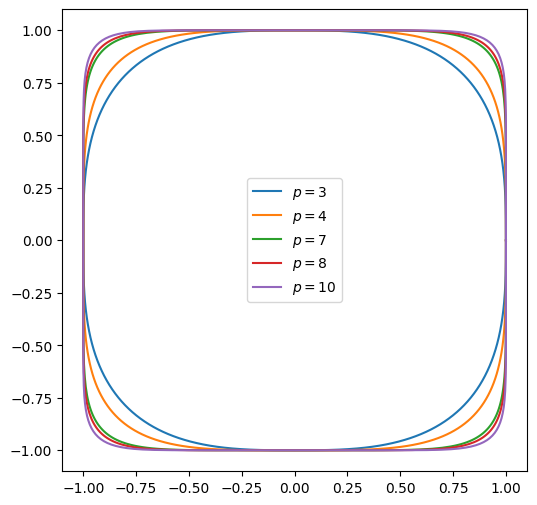

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
#ax.set(aspect=1)

for p in [3, 4, 7, 8, 10]:
	ax.plot(*lp_circle(p), label='$p={}$'.format(p))

ax.legend()
#plt.savefig('lp_unitarios.pdf', dpi=300)

In [4]:
import sympy as sp

In [5]:
theta, p = sp.symbols('theta p', real=True)
x, y = (sp.cos(theta))**(2/p), (sp.sin(theta))**(2/p)
x_1, x_2 = x.diff(theta), x.diff(theta, 2)
y_1, y_2 = y.diff(theta), y.diff(theta, 2)

In [6]:
k1 = (x_1 * y_2 - x_2 * y_1).simplify()
k2 = (x_1**2 + y_1**2).simplify()
display(k1, k2, (k1/k2**(3/2)).simplify())

8*(p - 1)*sin(theta)**(-1 + 2/p)*cos(theta)**(-1 + 2/p)/p**3

4*(sin(theta)**(4/p)/tan(theta)**2 + cos(theta)**(4/p)*tan(theta)**2)/p**2

1.0*(p - 1)*sin(theta)**(-1 + 2/p)*cos(theta)**(-1 + 2/p)/(p**3*((sin(theta)**(4/p) + cos(theta)**(4/p)*tan(theta)**4)/(p**2*tan(theta)**2))**1.5)

In [7]:
k = k1/k2**(3/2)

for p_norm in [3, 4, 7, 8, 10]:
	k_p = k.subs(p, p_norm)
	display(k_p.simplify())

2.0/(((sin(theta)**(4/3) + cos(theta)**(4/3)*tan(theta)**4)/tan(theta)**2)**1.5*sin(theta)**(1/3)*cos(theta)**(1/3))

3.0/((-sqrt(2)*sin(theta + pi/4) + 1/cos(theta) + 1/sin(theta))**1.5*sqrt(sin(theta))*sqrt(cos(theta)))

6.0/(((sin(theta)**(4/7) + cos(theta)**(4/7)*tan(theta)**4)/tan(theta)**2)**1.5*sin(theta)**(5/7)*cos(theta)**(5/7))

7.0/(((sqrt(sin(theta)) + sqrt(cos(theta))*tan(theta)**4)/tan(theta)**2)**1.5*sin(theta)**(3/4)*cos(theta)**(3/4))

9.0/(((sin(theta)**(2/5) + cos(theta)**(2/5)*tan(theta)**4)/tan(theta)**2)**1.5*sin(theta)**(4/5)*cos(theta)**(4/5))

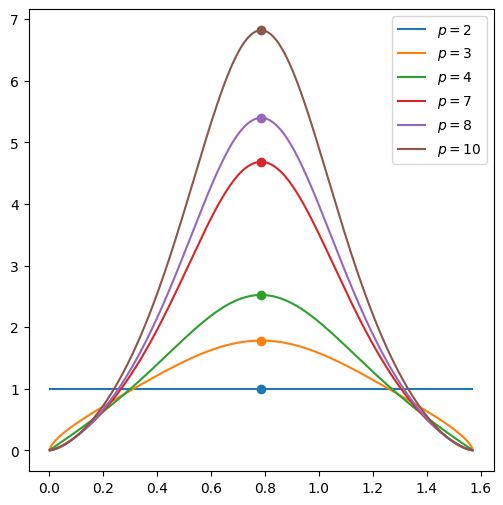

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
#plt.xticks(np.linspace(0, np.pi/2, 5))

angles = np.linspace(0.001, np.pi/2-0.001, 300)
for p_norm in [2, 3, 4, 7, 8, 10]:
	k_p = k.subs(p, p_norm)
	k_plot = sp.lambdify(theta, k_p, 'numpy')
	ax.plot(angles, k_plot(angles), label='$p={}$'.format(p_norm))
	ax.scatter(np.pi/4, k_plot(np.pi/4))

ax.legend()
#plt.savefig('curvatura.pdf', dpi=300)